In [1]:
#import those packages
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
plt.style.use('ggplot')
from matplotlib.pyplot import figure
%matplotlib inline
matplotlib.rcParams['figure.figsize']=(12,8)

In [51]:
# read the csv file
df=pd.read_csv('C:/Users/Varsha/OneDrive/Desktop/Work File/movies.csv')

In [3]:
df.head()

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime
0,The Shining,R,Drama,1980,"June 13, 1980 (United States)",8.4,927000.0,Stanley Kubrick,Stephen King,Jack Nicholson,United Kingdom,19000000.0,46998772.0,Warner Bros.,146.0
1,The Blue Lagoon,R,Adventure,1980,"July 2, 1980 (United States)",5.8,65000.0,Randal Kleiser,Henry De Vere Stacpoole,Brooke Shields,United States,4500000.0,58853106.0,Columbia Pictures,104.0
2,Star Wars: Episode V - The Empire Strikes Back,PG,Action,1980,"June 20, 1980 (United States)",8.7,1200000.0,Irvin Kershner,Leigh Brackett,Mark Hamill,United States,18000000.0,538375067.0,Lucasfilm,124.0
3,Airplane!,PG,Comedy,1980,"July 2, 1980 (United States)",7.7,221000.0,Jim Abrahams,Jim Abrahams,Robert Hays,United States,3500000.0,83453539.0,Paramount Pictures,88.0
4,Caddyshack,R,Comedy,1980,"July 25, 1980 (United States)",7.3,108000.0,Harold Ramis,Brian Doyle-Murray,Chevy Chase,United States,6000000.0,39846344.0,Orion Pictures,98.0


In [4]:
#find out the missing data
for col in df.columns:
    pct_missing = np.mean(df[col].isnull())
    print('{} - {}%'.format(col, pct_missing))

name - 0.0%
rating - 0.010041731872717789%
genre - 0.0%
year - 0.0%
released - 0.0002608242044861763%
score - 0.0003912363067292645%
votes - 0.0003912363067292645%
director - 0.0%
writer - 0.0003912363067292645%
star - 0.00013041210224308815%
country - 0.0003912363067292645%
budget - 0.2831246739697444%
gross - 0.02464788732394366%
company - 0.002217005738132499%
runtime - 0.0005216484089723526%


In [5]:
df.dtypes

name         object
rating       object
genre        object
year          int64
released     object
score       float64
votes       float64
director     object
writer       object
star         object
country      object
budget      float64
gross       float64
company      object
runtime     float64
dtype: object

In [52]:
# fill the missind data
df['score']=df['score'].fillna(0).astype(float)
df['votes']=df['votes'].fillna(0).astype(float)
df['budget']=df['budget'].fillna(0).astype(float)
df['gross']=df['gross'].fillna(0).astype(float)
df['runtime']=df['runtime'].fillna(0).astype(float)

df['rating']=df['rating'].fillna('NA').astype(object)
df['released']=df['released'].fillna('NA').astype(object)
df['writer']=df['writer'].fillna('NA').astype(object)
df['star']=df['star'].fillna('NA').astype(object)
df['country']=df['country'].fillna('NA').astype(object)
df['company']=df['company'].fillna('NA').astype(object)

In [7]:
for col in df.columns:
    pct_missing = np.mean(df[col].isnull())
    print('{} - {}%'.format(col, pct_missing))

name - 0.0%
rating - 0.0%
genre - 0.0%
year - 0.0%
released - 0.0%
score - 0.0%
votes - 0.0%
director - 0.0%
writer - 0.0%
star - 0.0%
country - 0.0%
budget - 0.0%
gross - 0.0%
company - 0.0%
runtime - 0.0%


In [53]:
#change the datatype of budget, gross, and runtime
df['budget']=df['budget'].astype('int64')
df['gross']=df['gross'].astype(dtype='int64')
df['runtime']=df['runtime'].astype('int64')

In [9]:
df

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime
0,The Shining,R,Drama,1980,"June 13, 1980 (United States)",8.4,927000.0,Stanley Kubrick,Stephen King,Jack Nicholson,United Kingdom,19000000,46998772,Warner Bros.,146
1,The Blue Lagoon,R,Adventure,1980,"July 2, 1980 (United States)",5.8,65000.0,Randal Kleiser,Henry De Vere Stacpoole,Brooke Shields,United States,4500000,58853106,Columbia Pictures,104
2,Star Wars: Episode V - The Empire Strikes Back,PG,Action,1980,"June 20, 1980 (United States)",8.7,1200000.0,Irvin Kershner,Leigh Brackett,Mark Hamill,United States,18000000,538375067,Lucasfilm,124
3,Airplane!,PG,Comedy,1980,"July 2, 1980 (United States)",7.7,221000.0,Jim Abrahams,Jim Abrahams,Robert Hays,United States,3500000,83453539,Paramount Pictures,88
4,Caddyshack,R,Comedy,1980,"July 25, 1980 (United States)",7.3,108000.0,Harold Ramis,Brian Doyle-Murray,Chevy Chase,United States,6000000,39846344,Orion Pictures,98
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7663,More to Life,NA,Drama,2020,"October 23, 2020 (United States)",3.1,18.0,Joseph Ebanks,Joseph Ebanks,Shannon Bond,United States,7000,0,NA,90
7664,Dream Round,NA,Comedy,2020,"February 7, 2020 (United States)",4.7,36.0,Dusty Dukatz,Lisa Huston,Michael Saquella,United States,0,0,Cactus Blue Entertainment,90
7665,Saving Mbango,NA,Drama,2020,"April 27, 2020 (Cameroon)",5.7,29.0,Nkanya Nkwai,Lynno Lovert,Onyama Laura,United States,58750,0,Embi Productions,0
7666,It's Just Us,NA,Drama,2020,"October 1, 2020 (United States)",0.0,0.0,James Randall,James Randall,Christina Roz,United States,15000,0,NA,120


In [54]:
df.sort_values(by=['gross'], inplace=False, ascending=False).head()

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime
5445,Avatar,PG-13,Action,2009,"December 18, 2009 (United States)",7.8,1100000.0,James Cameron,James Cameron,Sam Worthington,United States,237000000,2847246203,Twentieth Century Fox,162
7445,Avengers: Endgame,PG-13,Action,2019,"April 26, 2019 (United States)",8.4,903000.0,Anthony Russo,Christopher Markus,Robert Downey Jr.,United States,356000000,2797501328,Marvel Studios,181
3045,Titanic,PG-13,Drama,1997,"December 19, 1997 (United States)",7.8,1100000.0,James Cameron,James Cameron,Leonardo DiCaprio,United States,200000000,2201647264,Twentieth Century Fox,194
6663,Star Wars: Episode VII - The Force Awakens,PG-13,Action,2015,"December 18, 2015 (United States)",7.8,876000.0,J.J. Abrams,Lawrence Kasdan,Daisy Ridley,United States,245000000,2069521700,Lucasfilm,138
7244,Avengers: Infinity War,PG-13,Action,2018,"April 27, 2018 (United States)",8.4,897000.0,Anthony Russo,Christopher Markus,Robert Downey Jr.,United States,321000000,2048359754,Marvel Studios,149


In [35]:
pd.set_option('display.max_rows', None)

In [55]:
df.sort_values(by=['gross'], inplace=False, ascending=False).head()

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime
5445,Avatar,PG-13,Action,2009,"December 18, 2009 (United States)",7.8,1100000.0,James Cameron,James Cameron,Sam Worthington,United States,237000000,2847246203,Twentieth Century Fox,162
7445,Avengers: Endgame,PG-13,Action,2019,"April 26, 2019 (United States)",8.4,903000.0,Anthony Russo,Christopher Markus,Robert Downey Jr.,United States,356000000,2797501328,Marvel Studios,181
3045,Titanic,PG-13,Drama,1997,"December 19, 1997 (United States)",7.8,1100000.0,James Cameron,James Cameron,Leonardo DiCaprio,United States,200000000,2201647264,Twentieth Century Fox,194
6663,Star Wars: Episode VII - The Force Awakens,PG-13,Action,2015,"December 18, 2015 (United States)",7.8,876000.0,J.J. Abrams,Lawrence Kasdan,Daisy Ridley,United States,245000000,2069521700,Lucasfilm,138
7244,Avengers: Infinity War,PG-13,Action,2018,"April 27, 2018 (United States)",8.4,897000.0,Anthony Russo,Christopher Markus,Robert Downey Jr.,United States,321000000,2048359754,Marvel Studios,149


In [56]:
#drop duplicates
df['company'].drop_duplicates().head()

0          Warner Bros.
1     Columbia Pictures
2             Lucasfilm
3    Paramount Pictures
4        Orion Pictures
Name: company, dtype: object

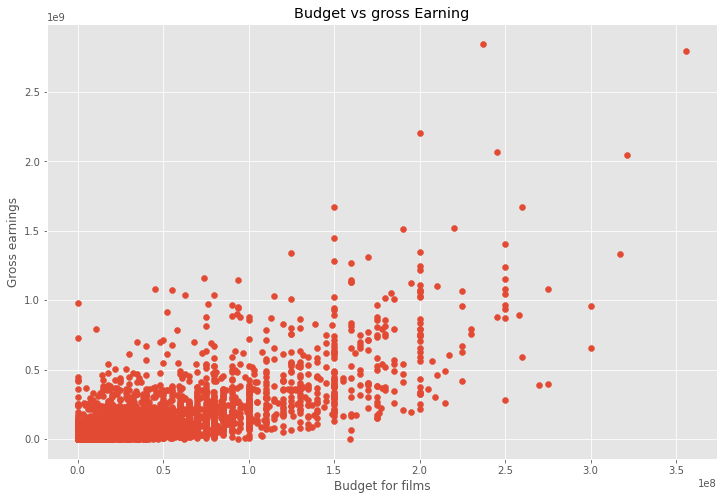

In [15]:
#budget and company has high correlation
#scatter plot with budget and gross
plt.scatter(x=df['budget'], y=df['gross'])
plt.title('Budget vs gross Earning')
plt.xlabel('Budget for films')
plt.ylabel('Gross earnings')
plt.show()

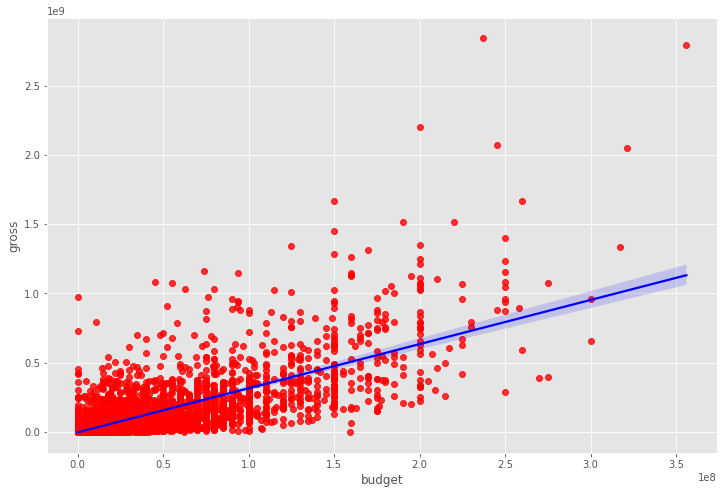

In [19]:
#plot budget vs gross using seaborn

sns.regplot(x='budget', y='gross', data=df, scatter_kws={"color":"red"}, line_kws={"color":"blue"});

In [24]:
# let's see correlations between columns
#types of  correlations: pearson, kendall, spearman

df.corr(method='pearson')

,year,score,votes,budget,gross,runtime
year,1.000000,0.092616,0.222427,0.309212,0.261900,0.116358
score,0.092616,1.000000,0.407101,0.056863,0.186012,0.394564
votes,0.222427,0.407101,1.000000,0.486931,0.632870,0.306984
budget,0.309212,0.056863,0.486931,1.000000,0.750157,0.268372
gross,0.261900,0.186012,0.632870,0.750157,1.000000,0.244339
runtime,0.116358,0.394564,0.306984,0.268372,0.244339,1.000000


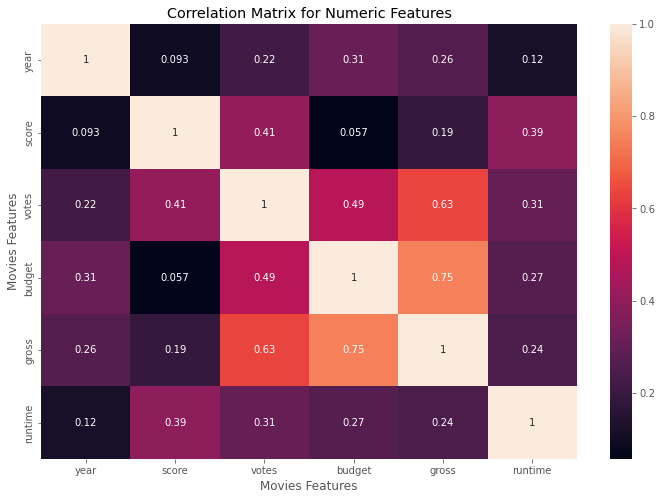

In [26]:
correlation_maxtrix=df.corr(method='pearson')

sns.heatmap(correlation_maxtrix, annot=True)
plt.title('Correlation Matrix for Numeric Features')
plt.xlabel('Movies Features')
plt.ylabel('Movies Features')
plt.show()

In [46]:
df_numerized=df

for col_name in df_numerized.columns:
    if(df_numerized[col_name].dtype=="object"):
        df_numerized[col_name]=df_numerized[col_name].astype('category')
        df_numerized[col_name]=df_numerized[col_name].cat.codes

df_numerized.head()

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime
0,6587,7,6,1980,1705,8.4,927000.0,2589,4015,1047,55,19000000,46998772,2320,146
1,5573,7,1,1980,1492,5.8,65000.0,2269,1632,327,56,4500000,58853106,731,104
2,5142,5,0,1980,1771,8.7,1200000.0,1111,2567,1745,56,18000000,538375067,1540,124
3,286,5,4,1980,1492,7.7,221000.0,1301,2000,2247,56,3500000,83453539,1813,88
4,1027,7,4,1980,1543,7.3,108000.0,1054,521,410,56,6000000,39846344,1778,98


In [57]:
df.head()

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime
0,The Shining,R,Drama,1980,"June 13, 1980 (United States)",8.4,927000.0,Stanley Kubrick,Stephen King,Jack Nicholson,United Kingdom,19000000,46998772,Warner Bros.,146
1,The Blue Lagoon,R,Adventure,1980,"July 2, 1980 (United States)",5.8,65000.0,Randal Kleiser,Henry De Vere Stacpoole,Brooke Shields,United States,4500000,58853106,Columbia Pictures,104
2,Star Wars: Episode V - The Empire Strikes Back,PG,Action,1980,"June 20, 1980 (United States)",8.7,1200000.0,Irvin Kershner,Leigh Brackett,Mark Hamill,United States,18000000,538375067,Lucasfilm,124
3,Airplane!,PG,Comedy,1980,"July 2, 1980 (United States)",7.7,221000.0,Jim Abrahams,Jim Abrahams,Robert Hays,United States,3500000,83453539,Paramount Pictures,88
4,Caddyshack,R,Comedy,1980,"July 25, 1980 (United States)",7.3,108000.0,Harold Ramis,Brian Doyle-Murray,Chevy Chase,United States,6000000,39846344,Orion Pictures,98


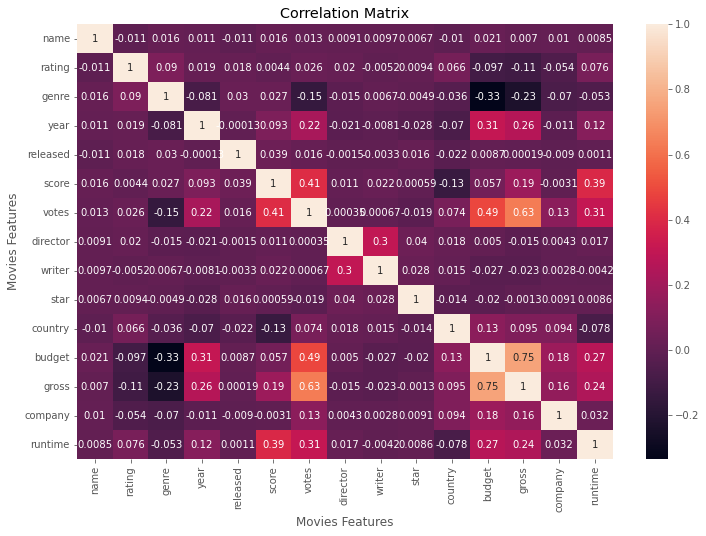

In [39]:
correlation_maxtrix=df_numerized.corr(method='pearson')

sns.heatmap(correlation_maxtrix, annot=True)
plt.title('Correlation Matrix')
plt.xlabel('Movies Features')
plt.ylabel('Movies Features')
plt.show()

In [41]:
df_numerized.corr()

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime
name,1.000000,-0.010640,0.016355,0.011453,-0.010703,0.016377,0.013038,0.009079,0.009733,0.006742,-0.010397,0.020548,0.006989,0.010087,0.008483
rating,-0.010640,1.000000,0.090041,0.018928,0.017688,0.004441,0.026496,0.020088,-0.005207,0.009375,0.066148,-0.097327,-0.107710,-0.053517,0.075784
genre,0.016355,0.090041,1.000000,-0.081261,0.030296,0.027384,-0.145296,-0.015258,0.006701,-0.004873,-0.036475,-0.334021,-0.234297,-0.070445,-0.052914
year,0.011453,0.018928,-0.081261,1.000000,-0.000128,0.092616,0.222427,-0.020795,-0.008141,-0.027729,-0.069946,0.309212,0.261900,-0.011193,0.116358
released,-0.010703,0.017688,0.030296,-0.000128,1.000000,0.039362,0.015911,-0.001517,-0.003342,0.015566,-0.022202,0.008688,0.000186,-0.008973,0.001072
score,0.016377,0.004441,0.027384,0.092616,0.039362,1.000000,0.407101,0.010568,0.022378,0.000587,-0.134223,0.056863,0.186012,-0.003112,0.394564
votes,0.013038,0.026496,-0.145296,0.222427,0.015911,0.407101,1.000000,0.000349,0.000672,-0.019316,0.073732,0.486931,0.632870,0.131575,0.306984
director,0.009079,0.020088,-0.015258,-0.020795,-0.001517,0.010568,0.000349,1.000000,0.299519,0.039700,0.017736,0.004976,-0.014916,0.004295,0.017062
writer,0.009733,-0.005207,0.006701,-0.008141,-0.003342,0.022378,0.000672,0.299519,1.000000,0.028432,0.014760,-0.026544,-0.022986,0.002814,-0.004160
star,0.006742,0.009375,-0.004873,-0.027729,0.015566,0.000587,-0.019316,0.039700,0.028432,1.000000,-0.014396,-0.020153,-0.001269,0.009128,0.008556


In [42]:
correlation_mat= df_numerized.corr()

corr_pairs= correlation_mat.unstack()
corr_pairs

name      name        1.000000
          rating     -0.010640
          genre       0.016355
          year        0.011453
          released   -0.010703
          score       0.016377
          votes       0.013038
          director    0.009079
          writer      0.009733
          star        0.006742
          country    -0.010397
          budget      0.020548
          gross       0.006989
          company     0.010087
          runtime     0.008483
rating    name       -0.010640
          rating      1.000000
          genre       0.090041
          year        0.018928
          released    0.017688
          score       0.004441
          votes       0.026496
          director    0.020088
          writer     -0.005207
          star        0.009375
          country     0.066148
          budget     -0.097327
          gross      -0.107710
          company    -0.053517
          runtime     0.075784
genre     name        0.016355
          rating      0.090041
        

In [43]:
sorted_pairs=corr_pairs.sort_values()
sorted_pairs

budget    genre      -0.334021
genre     budget     -0.334021
          gross      -0.234297
gross     genre      -0.234297
votes     genre      -0.145296
genre     votes      -0.145296
score     country    -0.134223
country   score      -0.134223
rating    gross      -0.107710
gross     rating     -0.107710
rating    budget     -0.097327
budget    rating     -0.097327
genre     year       -0.081261
year      genre      -0.081261
country   runtime    -0.077591
runtime   country    -0.077591
genre     company    -0.070445
company   genre      -0.070445
year      country    -0.069946
country   year       -0.069946
company   rating     -0.053517
rating    company    -0.053517
genre     runtime    -0.052914
runtime   genre      -0.052914
country   genre      -0.036475
genre     country    -0.036475
year      star       -0.027729
star      year       -0.027729
writer    budget     -0.026544
budget    writer     -0.026544
writer    gross      -0.022986
gross     writer     -0.022986
country 

In [44]:
high_corr=sorted_pairs[(sorted_pairs)>0.5]
high_corr

gross     votes       0.632870
votes     gross       0.632870
gross     budget      0.750157
budget    gross       0.750157
name      name        1.000000
director  director    1.000000
gross     gross       1.000000
budget    budget      1.000000
country   country     1.000000
star      star        1.000000
writer    writer      1.000000
votes     votes       1.000000
score     score       1.000000
released  released    1.000000
year      year        1.000000
genre     genre       1.000000
rating    rating      1.000000
company   company     1.000000
runtime   runtime     1.000000
dtype: float64

In [ ]:
#votes and budget have the highest correlation with the gross earning

In [ ]:
#company has the lowest correlation